# اتصال به گوگل درایو


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# نصب و فراخوانی کتابخانه های مورد نیاز

## نصب کتابخانه‌های ناموجود

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=73d10b4dee1b25ef2ce2f93eb7096810715d37723fb45ee00de4b56962c33b09
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
!pip install imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## فراخوانی کتابخانه‌ها

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
import eli5
from eli5.sklearn import PermutationImportance
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

# تنظیمات

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns', None)

# فراخوانی مجموعه داده کد گذاری شده

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/مواد پایان نامه/مجموعه داده‌های کد گذاری شده/Encoded_Data.csv")

In [ ]:
df

,ts,id.orig_p,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,id.orig_h_freq,id.resp_h_freq,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_Other,conn_state_REJ,conn_state_RSTOS0,conn_state_RSTR,conn_state_S0,conn_state_S3,conn_state_SF,history_C,history_D,history_Dd,history_I,history_Other,history_S,history_ShAdDaf,label
0,1.540469e+09,58687.0,123.0,1.0,76.0,1.0,76.0,452,26,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1.540469e+09,1900.0,1900.0,24.0,8208.0,0.0,0.0,452,15,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,1.540469e+09,32893.0,123.0,1.0,76.0,1.0,76.0,452,26,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1.540470e+09,53395.0,443.0,5.0,212.0,3.0,144.0,452,47,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,1.540470e+09,52801.0,53.0,1.0,62.0,1.0,339.0,452,1962,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173109,1.569018e+09,11801.0,62336.0,0.0,0.0,0.0,0.0,19991,9988,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
173110,1.569018e+09,2837.0,62336.0,0.0,0.0,0.0,0.0,19991,9988,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
173111,1.569018e+09,1966.0,62336.0,0.0,0.0,0.0,0.0,19991,9988,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
173112,1.569018e+09,40430.0,62336.0,0.0,0.0,0.0,0.0,19991,9988,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2


# تقسیم داده به آموزش و تست

In [ ]:
# Split the data into two sets: df_train and df_test
df_train = df[df['label'] != 1].copy()  # all classes except 1
df_test = df[df['label'] == 1].copy()  # class 1 only

# Add class 0 from df to df_test as much as rows from label 1
num_class_1_samples = df_test.shape[0]
df_test_class_0 = df[df['label'] == 0].sample(n=num_class_1_samples, random_state=42)
df_test = pd.concat([df_test, df_test_class_0])

# Shuffle the rows of df_test
df_test = shuffle(df_test, random_state=42)
df_train = shuffle(df_train, random_state=42)


df_train = pd.concat([df_train,df_test_class_0]).drop_duplicates(keep=False)


# Change the labels that are 1 to 1 in the df_test(this code is for in case we choose other class as test)
df_test.loc[df_test['label'] == 1, 'label'] = 1

# Change all labels except 0 to 1 in the df_train
df_train.loc[df_train['label'] != 0, 'label'] = 1


In [ ]:
df_train

,ts,id.orig_p,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,id.orig_h_freq,id.resp_h_freq,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_Other,conn_state_REJ,conn_state_RSTOS0,conn_state_RSTR,conn_state_S0,conn_state_S3,conn_state_SF,history_C,history_D,history_Dd,history_I,history_Other,history_S,history_ShAdDaf,label
86605,1.545467e+09,65279.0,80.0,0.0,0.0,0.0,0.0,19991,6096,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
141452,1.551410e+09,35100.0,23.0,2.0,120.0,0.0,0.0,9995,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
88883,1.545428e+09,56308.0,23.0,3.0,180.0,0.0,0.0,9998,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
634,1.537525e+09,46657.0,80.0,1.0,40.0,0.0,0.0,979,6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
155985,1.552094e+09,63420.0,23.0,2.0,80.0,0.0,0.0,24418,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62804,1.538494e+09,42258.0,53.0,1.0,73.0,1.0,73.0,13022,2444,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
114541,1.547077e+09,44619.0,22.0,1.0,40.0,0.0,0.0,10000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
142795,1.551395e+09,44754.0,23.0,6.0,360.0,0.0,0.0,9995,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
157730,1.552065e+09,63420.0,23.0,2.0,80.0,0.0,0.0,24418,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [ ]:
df_test

,ts,id.orig_p,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,id.orig_h_freq,id.resp_h_freq,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_Other,conn_state_REJ,conn_state_RSTOS0,conn_state_RSTR,conn_state_S0,conn_state_S3,conn_state_SF,history_C,history_D,history_Dd,history_I,history_Other,history_S,history_ShAdDaf,label
93576,1.545456e+09,54144.0,23.0,3.0,180.0,0.0,0.0,9998,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
38216,1.533059e+09,34744.0,50.0,1.0,60.0,0.0,0.0,13282,3960,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
119683,1.547129e+09,51554.0,4975.0,8.0,503.0,9.0,700.0,24418,1947,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
97923,1.545432e+09,36946.0,23.0,3.0,180.0,0.0,0.0,9998,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
32645,1.533118e+09,37708.0,50.0,1.0,60.0,0.0,0.0,13282,3960,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89498,1.545479e+09,41712.0,23.0,1.0,60.0,0.0,0.0,9998,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
131947,1.547148e+09,41161.0,23.0,1.0,40.0,0.0,0.0,19999,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
38783,1.533125e+09,47204.0,50.0,1.0,60.0,0.0,0.0,13282,3958,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
33022,1.533114e+09,46656.0,50.0,1.0,60.0,0.0,0.0,13282,3958,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [ ]:
X_train = df_train.drop("label", axis = 1)
y_train = df_train["label"]
X_test = df_test.drop("label", axis = 1)
y_test = df_test["label"]

# نرمال کردن

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index = X_test.index )

# متعادل کردن کلاس‌های مسئله

In [ ]:
sm = SMOTE(random_state=42)
X_train_sampled, y_train_sampled = sm.fit_resample(X_train, y_train)


In [ ]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sampled))
print("y test:", Counter(y_test))

Before SMOTE: Counter({1: 130042, 0: 21346})
After SMOTE: Counter({1: 130042, 0: 130042})
y test: Counter({0: 10863, 1: 10863})


# نام گذاری مجدد

In [ ]:
X_train = X_train_sampled
y_train = y_train_sampled

# مهندسی ویژگی‌ها

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

# Perform permutation feature importance
perm = PermutationImportance(model, random_state=1)
perm.fit(X_train, y_train)

# Visualize feature importances
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

Weight,Feature
0.1688 ± 0.0010,proto_tcp
0.1554 ± 0.0014,ts
0.1239 ± 0.0002,id.resp_p
0.0013 ± 0.0000,id.orig_h_freq
0.0012 ± 0.0001,orig_ip_bytes
0.0005 ± 0.0001,history_Other
0.0004 ± 0.0000,resp_pkts
0.0002 ± 0.0000,conn_state_SF
0.0002 ± 0.0000,id.resp_h_freq
0.0001 ± 0.0000,conn_state_REJ


In [ ]:
feature_importance = pd.Series(perm.feature_importances_, index=X_train.columns)

# Sort feature importance in descending order
sorted_importance = feature_importance.sort_values(ascending=False)

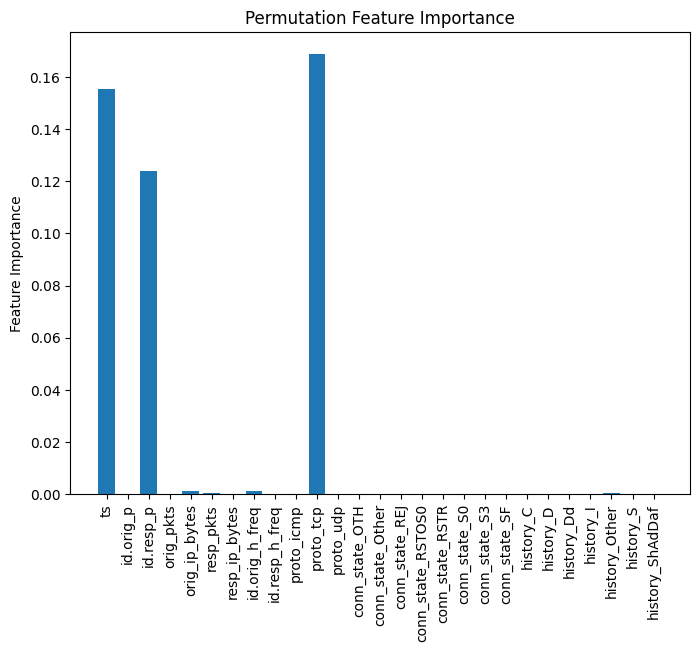

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(feature_importance.index, feature_importance.values)
ax.set_xticklabels(feature_importance.index, rotation=90)
ax.set_ylabel('Feature Importance')
ax.set_title('Permutation Feature Importance')
plt.show()

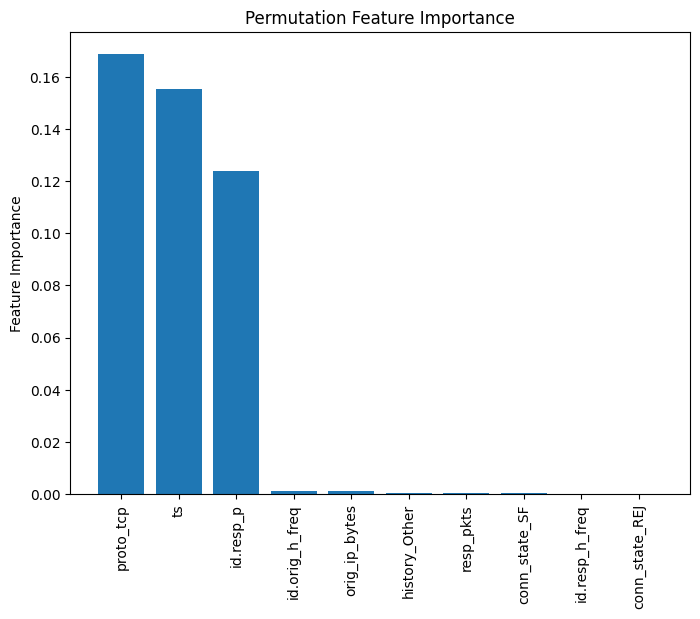

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(sorted_importance[:10].index, sorted_importance[:10].values)
ax.set_xticklabels(sorted_importance[:10].index, rotation=90)
ax.set_ylabel('Feature Importance')
ax.set_title('Permutation Feature Importance')
plt.show()

In [ ]:
top_10_features = sorted_importance[:10].index
X_train_engineered = X_train[top_10_features]
X_test_engineered = X_test[top_10_features]

In [ ]:
X_train_engineered

,proto_tcp,ts,id.resp_p,id.orig_h_freq,orig_ip_bytes,history_Other,resp_pkts,conn_state_SF,id.resp_h_freq,conn_state_REJ
0,0.289919,0.184601,-0.744067,0.683074,-0.002610,-0.095033,-0.003331,-0.213740,1.885697,-0.034116
1,0.289919,0.736506,-0.746640,-1.037555,-0.002584,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116
2,0.289919,0.180989,-0.746640,-1.037038,-0.002571,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116
3,0.289919,-0.552979,-0.744067,-2.589494,-0.002601,10.522617,-0.003331,-0.213740,-0.377345,-0.034116
4,0.289919,0.800025,-0.746640,1.445101,-0.002593,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116
...,...,...,...,...,...,...,...,...,...,...
260079,0.289919,0.340587,-0.746640,0.684451,-0.002601,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116
260080,-3.449240,0.341445,-0.742126,-2.717560,-0.002594,-0.095033,-0.003331,-0.213740,-0.312687,-0.034116
260081,-3.449240,-0.461320,-0.742126,-0.516512,-0.002594,-0.095033,-0.001711,4.678571,0.108336,-0.034116
260082,-3.449240,-0.454008,-0.745286,-0.471758,-0.002585,-0.095033,-0.003331,-0.213740,0.528615,-0.034116


# نام گذاری مجدد

In [ ]:
X_train = X_train_engineered
X_test = X_test_engineered

# ذخیره‌ی مجموعه داده پیش پردازش و مهندسی شده

In [ ]:
# Save X_train and y_train into train.csv
train_df = pd.concat([X_train, y_train], axis=1)
train_df.to_csv('/content/drive/MyDrive/مواد پایان نامه/مجموعه داده‌های پیش پردازش و مهندسی شده برای خوشه بندی/Train_Data.csv', index=False)

# Save X_test and y_test into test.csv
test_df = pd.concat([X_test, y_test], axis=1)
test_df.to_csv('/content/drive/MyDrive/مواد پایان نامه/مجموعه داده‌های پیش پردازش و مهندسی شده برای خوشه بندی/Test_Data.csv', index=False)

# فراخوانی داده

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/مواد پایان نامه/مجموعه داده‌های پیش پردازش و مهندسی شده برای خوشه بندی/Train_Data.csv")
test_df = pd.read_csv("/content/drive/MyDrive/مواد پایان نامه/مجموعه داده‌های پیش پردازش و مهندسی شده برای خوشه بندی/Test_Data.csv")


## کم کردن حجم داده آموزش به علت عدم پردازش

In [ ]:
# Define the number of samples you want to take from each class
n_samples_per_class = 50000 // len(train_df['label'].unique())  # integer division

# Group the original data frame by the label column
grouped = train_df.groupby('label')

# Sample a certain number of rows from each group
sampled_df = pd.DataFrame()
for name, group in grouped:
    sampled_group = group.sample(n=n_samples_per_class, random_state=42)
    sampled_df = pd.concat([sampled_df, sampled_group])

# Shuffle the sampled data frame
sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
X_train = sampled_df.drop("label", axis = 1)
y_train = sampled_df["label"]
#X_train = train_df.drop("label", axis = 1)
#y_train = train_df["label"]
X_test = test_df.drop("label", axis = 1)
y_test = test_df["label"]

# کتابخانه‌ها

In [ ]:
from sklearn.cluster import DBSCAN
import hdbscan

In [ ]:
model_DB = DBSCAN()
clusterer.fit(X_train)

HDBSCAN()

In [ ]:
X_train.loc[:, "cluster"] = clusterer.labels_

In [ ]:
DBSCAN_clust_sizes = X_train.groupby("cluster").size().to_frame()
DBSCAN_clust_sizes.columns = ["cluster_size"]
DBSCAN_clust_sizes

In [ ]:
X_train["label"] = y_train

In [ ]:
X_train

,proto_tcp,ts,id.resp_p,id.orig_h_freq,orig_ip_bytes,history_Other,resp_pkts,conn_state_SF,id.resp_h_freq,conn_state_REJ,cluster,label
0,0.289919,0.174411,0.932185,1.445101,-0.002601,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116,7,1
1,-3.449240,0.180281,-0.742126,0.683074,-0.002594,-0.095033,-0.003331,-0.213740,-0.251001,-0.034116,141,0
2,-3.449240,-1.626091,0.530926,-0.516512,-0.002601,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116,111,0
3,-3.449240,-0.462176,-0.742126,-0.516512,-0.002594,-0.095033,-0.001711,4.678571,0.108336,-0.034116,74,0
4,0.289919,0.735447,-0.382907,-1.037383,-0.002593,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116,69,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.289919,0.185502,-0.746640,-1.037038,-0.002571,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116,78,0
49996,0.289919,0.735138,-0.746640,-1.037555,-0.002584,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116,68,1
49997,0.289919,-1.014343,-0.746640,0.683590,-0.002601,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116,37,1
49998,-3.449240,-0.457090,-0.742126,-0.516512,-0.002594,-0.095033,-0.001711,4.678571,0.108336,-0.034116,74,0


In [ ]:
max_labels = X_train.groupby("cluster")["label"].apply(lambda x: x.value_counts().idxmax())
X_train["max_label"] = X_train["cluster"].map(max_labels)


In [ ]:
X_train

,proto_tcp,ts,id.resp_p,id.orig_h_freq,orig_ip_bytes,history_Other,resp_pkts,conn_state_SF,id.resp_h_freq,conn_state_REJ,cluster,label,max_label
0,0.289919,0.174411,0.932185,1.445101,-0.002601,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116,7,1,1
1,-3.449240,0.180281,-0.742126,0.683074,-0.002594,-0.095033,-0.003331,-0.213740,-0.251001,-0.034116,35,0,0
2,-3.449240,-1.626091,0.530926,-0.516512,-0.002601,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116,39,0,0
3,-3.449240,-0.462176,-0.742126,-0.516512,-0.002594,-0.095033,-0.001711,4.678571,0.108336,-0.034116,32,0,0
4,0.289919,0.735447,-0.382907,-1.037383,-0.002593,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.289919,0.185502,-0.746640,-1.037038,-0.002571,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116,16,0,0
49996,0.289919,0.735138,-0.746640,-1.037555,-0.002584,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116,13,1,1
49997,0.289919,-1.014343,-0.746640,0.683590,-0.002601,-0.095033,-0.003331,-0.213740,-0.379203,-0.034116,18,1,1
49998,-3.449240,-0.457090,-0.742126,-0.516512,-0.002594,-0.095033,-0.001711,4.678571,0.108336,-0.034116,32,0,0


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(X_train["label"], X_train["max_label"])
print("Accuracy:", accuracy)


Accuracy: 0.99004


In [ ]:
x_test_test = X_test.iloc[0:2]

In [ ]:
x_test_test

,proto_tcp,ts,id.resp_p,id.orig_h_freq,orig_ip_bytes,history_Other,resp_pkts,conn_state_SF,id.resp_h_freq,conn_state_REJ
0,0.289919,0.183591,-0.746640,-1.037038,-0.002571,-0.095033,-0.003331,-0.21374,-0.379203,-0.034116
1,0.289919,-0.967742,-0.745422,-0.471758,-0.002597,-0.095033,-0.003331,-0.21374,1.091960,-0.034116


In [ ]:


# predict cluster labels for X_test
test_labels, strengths = hdbscan.approximate_predict(clusterer, X_test)
test_labels

array([16, -1, 23, ..., -1, -1, 32], dtype=int32)

In [ ]:
test_labels

array([-1, -1])

In [ ]:
test_labels = pd.Series(test_labels)

In [ ]:
test_labels

0         78
1         -1
2         -1
3         78
4         -1
        ... 
21721     78
21722    236
21723     -1
21724     -1
21725     74
Length: 21726, dtype: int32

In [ ]:
y_pred = test_labels.map(max_labels)

In [ ]:
y_pred

0        0
1        0
2        0
3        0
4        0
        ..
21721    0
21722    0
21723    0
21724    0
21725    0
Length: 21726, dtype: int64

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# روش بهتر

In [ ]:
X_train = X_train[y_train == 0]

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data=True).fit(X_train)

In [ ]:
test_labels, strengths = hdbscan.approximate_predict(clusterer, X_test)
test_labels

array([ 3,  2, -1, ...,  2,  2, 31], dtype=int32)

In [ ]:
test_labels = pd.Series(test_labels)

In [ ]:
test_labels.value_counts()

 2      8063
 4      2873
 3      2635
 56     1328
-1       673
        ... 
 118       4
 64        4
 169       3
 57        3
 166       2
Length: 172, dtype: int64

In [ ]:
test_labels.loc[test_labels != -1] = 0

In [ ]:
test_labels.loc[test_labels == -1] = 1

In [ ]:
test_labels.value_counts()

0    21053
1      673
dtype: int64

In [ ]:
accuracy = accuracy_score(y_test, test_labels)
print("Accuracy:", accuracy)

Accuracy: 0.47509895977170213


# K_means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
n_clusters = np.arange(20,100)
clusters_inertia = []
s_scores = []
for n in n_clusters:
  KM_est = KMeans(n_clusters=n, init = "k-means++").fit(X_train)
  clusters_inertia.append(KM_est.inertia_)
  silhouette_avg = silhouette_score(X_train, KM_est.labels_)
  s_scores.append(silhouette_avg)

KeyboardInterrupt: ignored

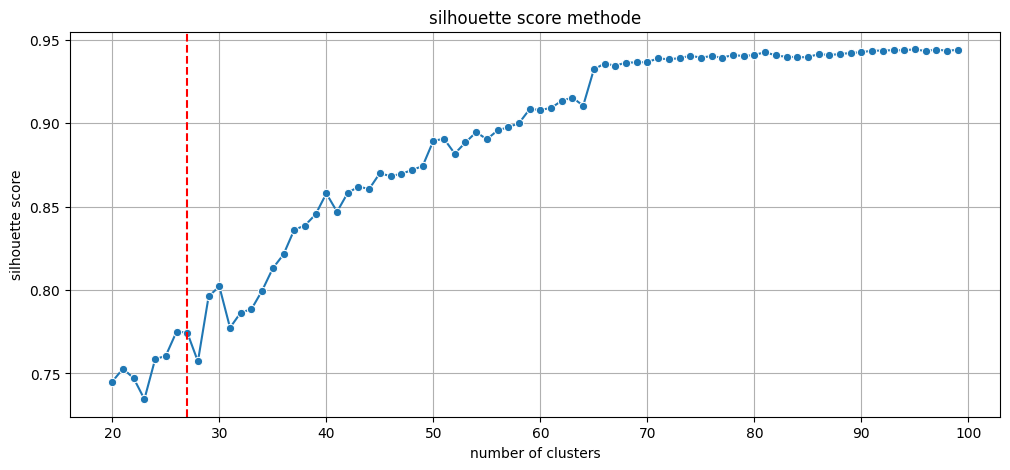

In [ ]:
fig, ax = plt.subplots(figsize = (12, 5))
ax = sns.lineplot(x = n_clusters, y = s_scores, marker = "o", ax= ax)

ax.set_title("silhouette score methode")
ax.set_xlabel("number of clusters")
ax.set_ylabel("silhouette score")
ax.axvline(27, ls = "--", c = "red")
plt.grid()
plt.show()

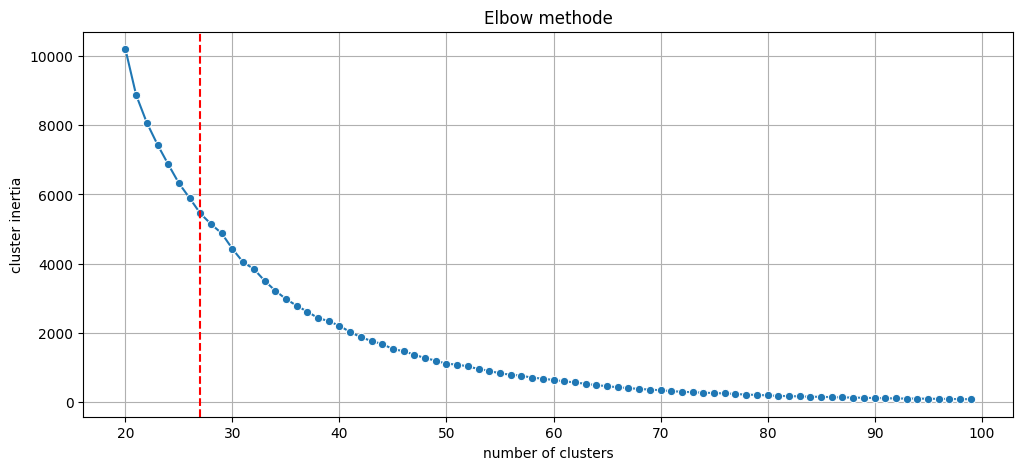

In [ ]:
fig, ax = plt.subplots(figsize = (12, 5))
ax = sns.lineplot(x = n_clusters, y = clusters_inertia, marker = "o", ax= ax)

ax.set_title("Elbow methode")
ax.set_xlabel("number of clusters")
ax.set_ylabel("cluster inertia")
ax.axvline(27, ls = "--", c = "red")
plt.grid()
plt.show()

In [ ]:
model = KMeans(n_clusters=60, init = "k-means++").fit(X_train)

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
X_train.loc[:, "cluster"] = model.labels_

In [ ]:
X_train

In [ ]:
KMeans_clust_sizes = X_train.groupby("cluster").size().to_frame()
KMeans_clust_sizes.columns = ["cluster_size"]
KMeans_clust_sizes

In [ ]:
X_train["label"] = y_train

In [ ]:
max_labels = X_train.groupby("cluster")["label"].apply(lambda x: x.value_counts().idxmax())
X_train["max_label"] = X_train["cluster"].map(max_labels)

In [ ]:
max_labels

In [ ]:
max_labels.to_frame()

In [ ]:
X_train

In [ ]:
accuracy = accuracy_score(X_train["label"], X_train["max_label"])
print("Accuracy:", accuracy)

Accuracy: 0.98322


In [ ]:
y_pred = pd.Series(y_pred)

In [ ]:
eval_df = pd.DataFrame()
eval_df["cluster"] = y_pred

In [ ]:
eval_df

In [ ]:
KMeans_clust_sizes_test = eval_df.groupby("cluster").size().to_frame()
KMeans_clust_sizes_test.columns = ["cluster_size"]
KMeans_clust_sizes_test

In [ ]:
eval_df["y_pred"] = eval_df["cluster"].map(max_labels)

In [ ]:
eval_df["y_test"] = y_test

In [ ]:
eval_df

,cluster,y_pred,y_test
0,4,0,0
1,7,1,1
2,23,0,0
3,4,0,0
4,7,1,1
...,...,...,...
21721,4,0,0
21722,18,0,0
21723,7,1,1
21724,7,1,1


In [ ]:
accuracy = accuracy_score(eval_df["y_test"], eval_df["y_pred"])
print("Accuracy:", accuracy)

Accuracy: 0.8571757341434226


In [ ]:
accuracy = f1_score(eval_df["y_test"], eval_df["y_pred"])
print("Accuracy:", accuracy)

Accuracy: 0.8363828104402847


# ارزیابی مدل

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def evaluate_model(y_test, y_pred, model_name):
    # Calculate True Positive Rate (TPR)
    tpr = recall_score(y_test, y_pred)
    
    # Calculate False Positive Rate (FPR)
    fpr = 1 - specificity_score(y_test, y_pred)
    
    # Calculate False Negative Rate (FNR)
    fnr = 1 - tpr
    
    # Calculate Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Calculate Precision
    precision = precision_score(y_test, y_pred)
    
    # Calculate F1 Score
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC Curve and AUC
    fpr_roc, tpr_roc, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr_roc, tpr_roc)
    
    # Plot ROC Curve
    plt.plot(fpr_roc, tpr_roc, color='blue', label='ROC Curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for ' + model_name)
    plt.legend()
    plt.show()
    
    # Return the results as a single dictionary with the model name as the key
    results = {
        model_name + "_results": {
            "TPR": tpr,
            "FPR": fpr,
            "FNR": fnr,
            "Accuracy": acc,
            "Precision": precision,
            "F1 Score": f1,
            "AUC": auc_score
        }
    }
    
    return results


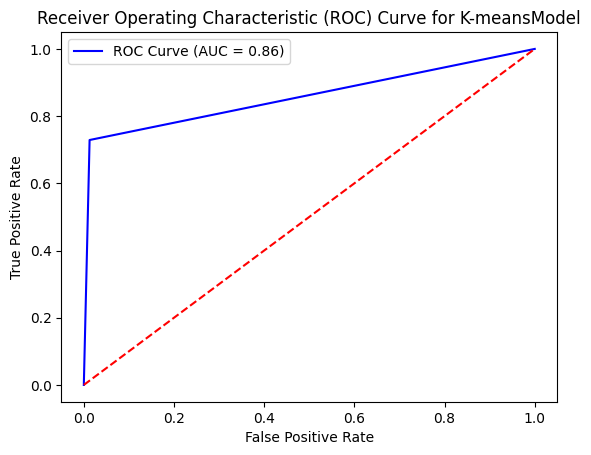

{'K-meansModel_results': {'TPR': 0.7288962533370156,
  'FPR': 0.012795728620086488,
  'FNR': 0.2711037466629844,
  'Accuracy': 0.8580502623584645,
  'Precision': 0.9827479210624301,
  'F1 Score': 0.8369978858350952,
  'AUC': 0.8580502623584646}}

In [ ]:
evaluate_model(eval_df["y_test"], eval_df["y_pred"], "K-meansModel")

In [ ]:
tpr = recall_score(eval_df["y_test"], eval_df["y_pred"])
tpr

0.7288962533370156

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def evaluate_model1(y_test, y_pred, model_name):
    # Calculate True Positive Rate (TPR)
    tpr = recall_score(y_test, y_pred)
    
    # Calculate False Positive Rate (FPR)
    fpr = roc_curve(y_test, y_pred)[0][1]
    
    # Calculate False Negative Rate (FNR)
    fnr = 1 - tpr
    
    # Calculate Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Calculate Precision
    precision = precision_score(y_test, y_pred)
    
    # Calculate F1 Score
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for ' + model_name)
    plt.legend()
    plt.show()
    
    # Return the results as a single dictionary with the model name as the key
    results = {
        model_name + "_results": {
            "TPR": tpr,
            "FPR": fpr,
            "FNR": fnr,
            "Accuracy": acc,
            "Precision": precision,
            "F1 Score": f1,
            "AUC": auc_score
        }
    }
    
    return results


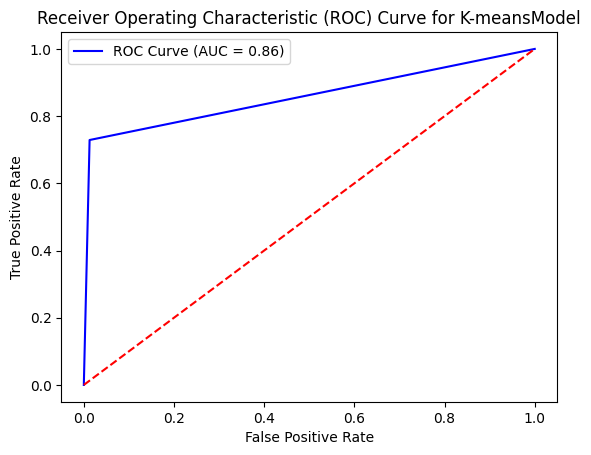

{'K-meansModel_results': {'TPR': array([0.        , 0.72889625, 1.        ]),
  'FPR': array([0.        , 0.01279573, 1.        ]),
  'FNR': 0.2711037466629844,
  'Accuracy': 0.8580502623584645,
  'Precision': 0.9827479210624301,
  'F1 Score': 0.8369978858350952,
  'AUC': 0.8580502623584646}}

In [ ]:
evaluate_model1(eval_df["y_test"], eval_df["y_pred"], "K-meansModel")